In [1]:
import scfutils
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
issues = pd.read_json("20170903_newport_issues_archive.json", orient="records")


In [16]:
issues.columns

Index(['acknowledged_at', 'address', 'closed_at', 'comment_url', 'created_at',
       'description', 'flag_url', 'html_url', 'id', 'lat', 'lng',
       'media.image_full', 'media.image_square_100x100',
       'media.representative_image_url', 'media.video_url',
       'point.coordinates', 'point.type', 'rating', 'reopened_at',
       'reporter.avatar.full', 'reporter.avatar.square_100x100',
       'reporter.civic_points', 'reporter.id', 'reporter.name',
       'reporter.role', 'reporter.witty_title', 'request_type.id',
       'request_type.organization', 'request_type.related_issues_url',
       'request_type.title', 'request_type.url', 'shortened_url', 'status',
       'summary', 'transitions.close_url', 'transitions.open_url',
       'updated_at', 'url'],
      dtype='object')

In [3]:
topen = issues.closed_at - issues.created_at
print(topen.max())
print(topen.mean())
print(topen.median())

2230 days 11:49:39
81 days 14:47:59.915712
4 days 01:12:51


In [18]:
topen.hist()

TypeError: Cannot cast ufunc less input from dtype('float64') to dtype('<m8[ns]') with casting rule 'same_kind'

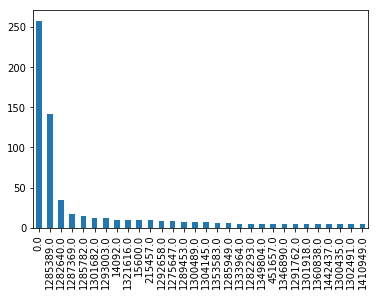

In [7]:
issues['reporter.id'].value_counts().head(30).plot.bar()
plt.show()

In [5]:
print(len(issues['reporter.id'].unique()))

197


In [6]:
now = pd.datetime.now()
still_open = issues[issues['closed_at'].isnull()]
hanging = now - still_open.created_at
print(hanging.mean())
print(hanging.median())

202 days 13:18:33.449381
83 days 11:36:01.949381
